<center><h1>ANN Assignment Week 3 - Diabetes Prediction </h1><br>

<img width="600px" src="https://images.everydayhealth.com/images/diabetes-awareness-month-1440x810.jpg">

</center> 


## Assignment Objective

> Construct, train and test an artificial neural network using a dataset of your own choice. Try different settings for two or more hyperparameters and investigate the effect on learning. Write a Jupyter notebook which contains your python code and in which you describe your approach and results. In your notebook, you should describe your dataset and add a reference to the source of your dataset. Also, include references to any source code or tutorials that you used to write your code. If your neural network is aimed at classification, you should create a confusion matrix and discuss the results. Also reflect on the knowledge and skills you acquired on artificial neural networks.

## Deliverable
Convert your Jupyter notebook to html and deliver the .html file.


## Problem Description

Diabetes is one of the major diseases of the population across the world. Diabetes is a chronic disease that occurs either when the pancreas does not produce enough insulin or when the body cannot efficiently use the insulin it produces. In 2014, 8.5% of adults aged 18 years and older had diabetes. In 2012, diabetes was the direct cause of 1.5 million deaths and high blood glucose was the cause of another 2.2 million deaths. Over the time, diabetes can damage the heart, blood vessels, eyes, kidneys, and nerves. Early diagnosis can be made through a relatively inexpensive method of computation. In this notebook the ANN model is used to analyze and make the diabetes prediction model.


## Assignment Goal

The goal of this assignment is to test how to work with Artificial Neural Networks (ANN). The <a href="https://www.kaggle.com/datasets/mathchi/diabetes-data-set">dataset</a> chosen for this is taken from the <a href="https://www.kaggle.com/">Kaggle's</a> website. 

## The Dataset

In this dataset, all patients are females at least 21 years old of Pima Indian heritage. The total number of instances is 768, which is completely used in this study. It contains 8 attributes plus one class (Label) column. Each attribute is numeric-valued; attributes of this dataset are as follows:

1. Number of times pregnant

2. Plasma glucose concentration at 2 h in an oral glucose tolerance test

3. Diastolic blood pressure (mm Hg)

4. Triceps skinfold thickness (mm)

5. 2-hour serum insulin (mu U/ml)

6. Body mass index (weight in kg/(height in m2)

7. Diabetes pedigree function

8. Age (years)

9. Class variable (0 or 1).

(Class value 1 is interpreted as "tested positive for diabetes").

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
import warnings;
warnings.simplefilter('ignore')
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

## Import the data

In [2]:
df = pd.read_csv("diabetes_new.csv")

In [3]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


I can already notice that there are null values in the form of zero's.

In [4]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

The values show that we do not have any missing data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Outcome'}>]], dtype=object)

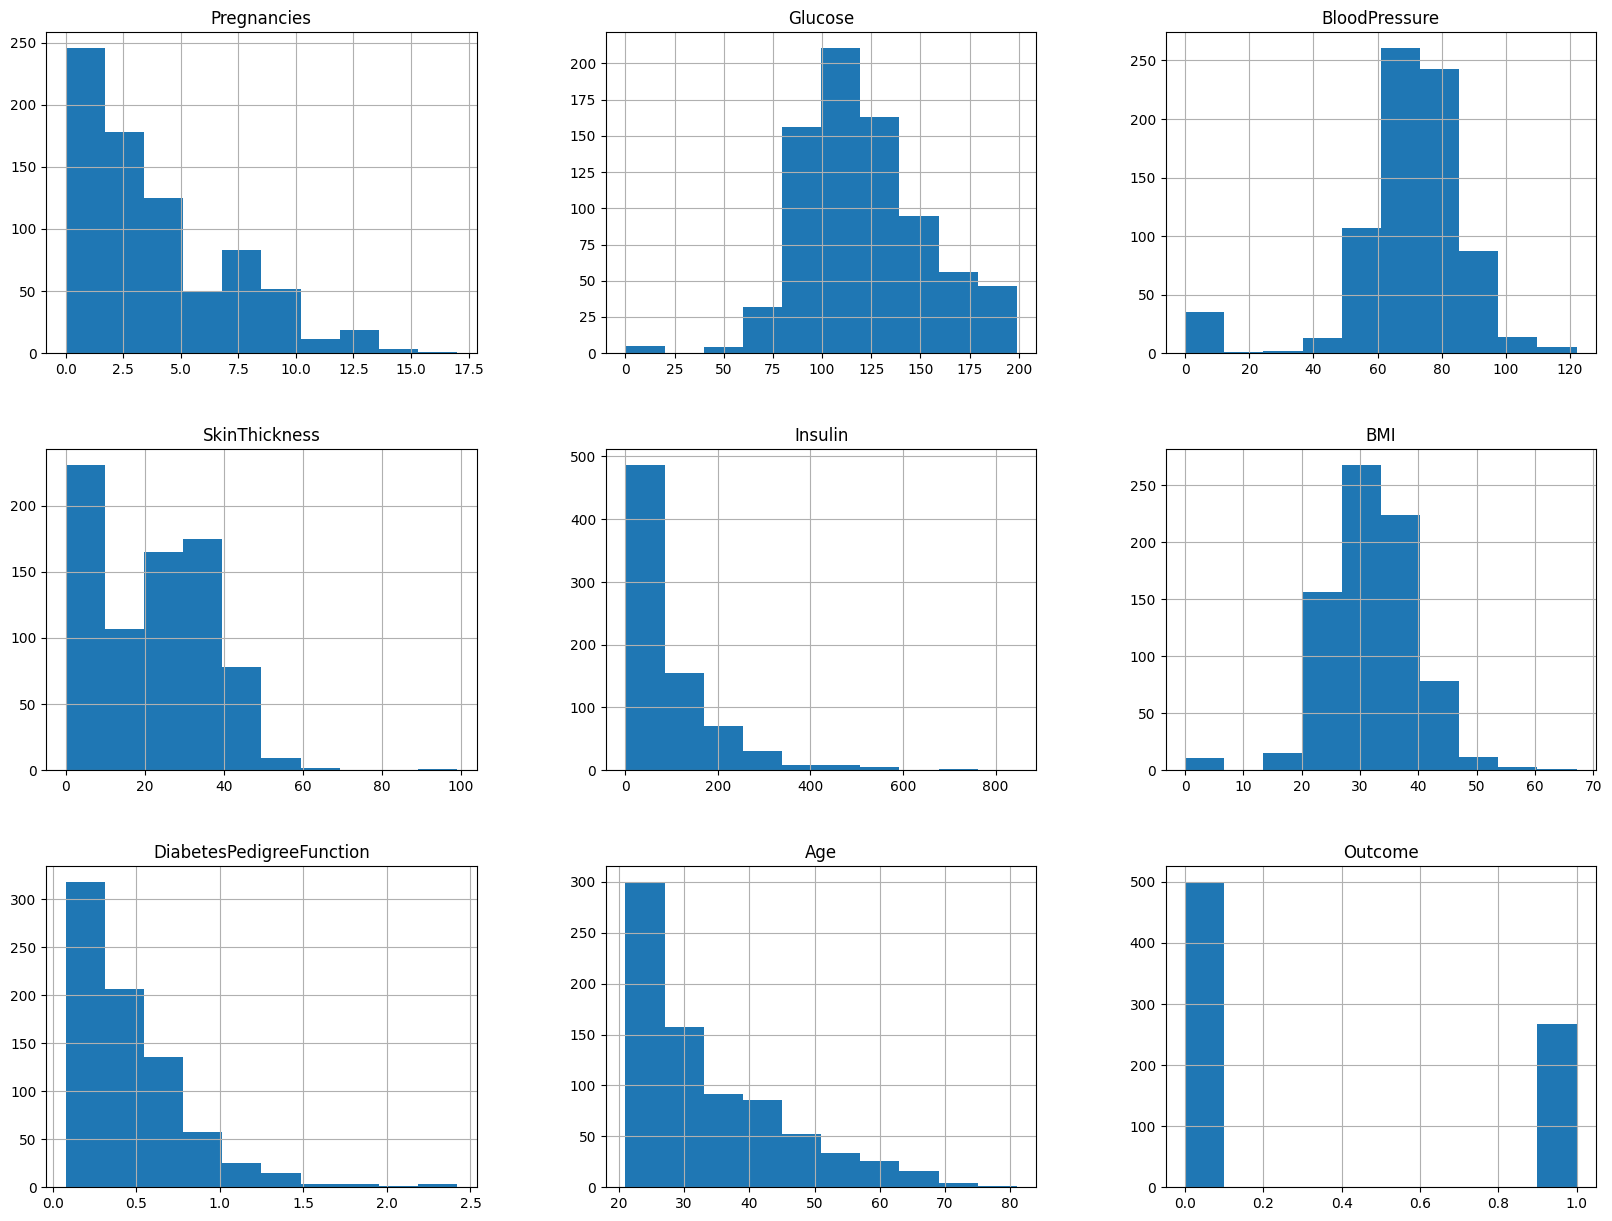

In [6]:
# I'll take a look at the distribution of the different parameters
df.hist(figsize=(20,15))

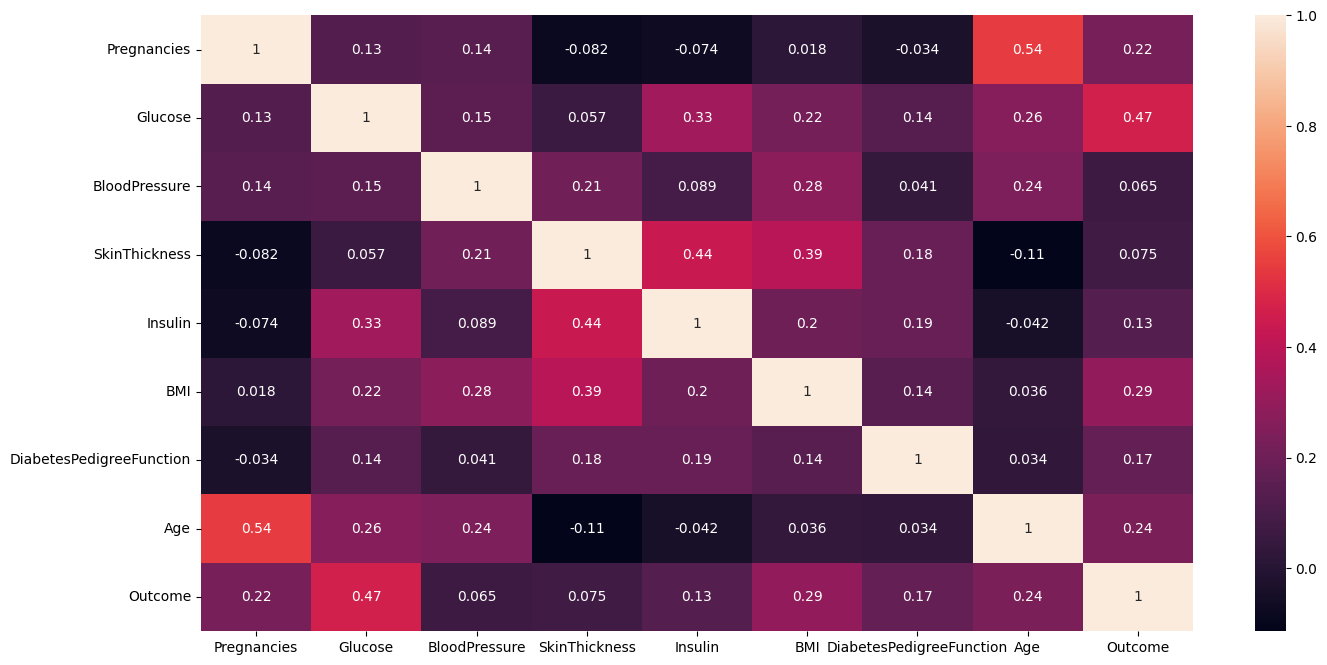

In [7]:
plt.figure(1 , figsize = (16 , 8))
cor = sns.heatmap(df.corr(), annot = True)

Insights: There appears to be no strong correlations among the numeric features. 

However, there are some slight correlations of Glucose, Insulin and Age with the outcome of the data.

## Check for missing values

In [8]:
#to determine presence of missing values in dataset, I'll replace the zeros with NaN
df[["Glucose", "SkinThickness","Insulin",
    "BloodPressure","BMI"]] =  df[["Glucose","SkinThickness", "Insulin","BloodPressure","BMI"]].replace(0, np.NaN)

In [9]:
df.isnull().sum()[1:8]

Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
dtype: int64

• Important Observations:

    ▪ As I mentioned above, it seems like null values are present in the form of zero's. Below, an approach will be taken to deal with this. 
    ▪ It's impossible to have Glucose, Blood Pressure, SkinThickness, Insulin and BMI to be zero.

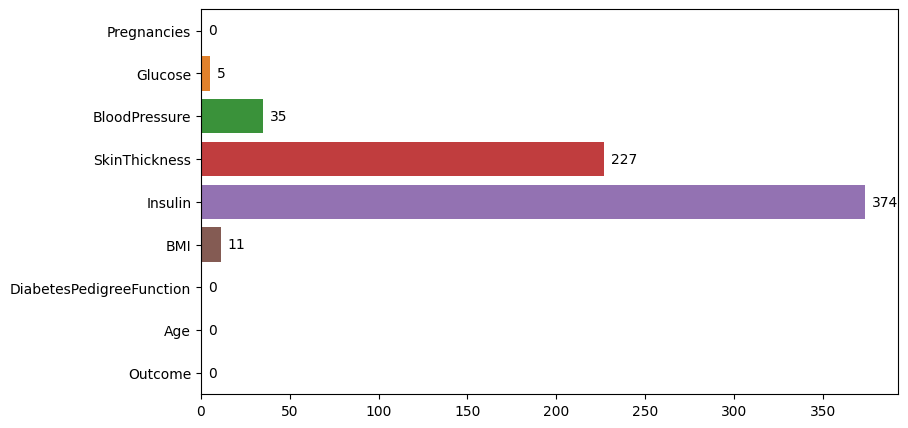

In [10]:
# Visualizing Null values in a bar chart for better overview
plt.figure(figsize=(9,5))
ax = sns.barplot(x=df.isna().sum(),
           y=df.columns, orient='h')
for p in ax.patches:
    ax.annotate(text=f"{p.get_width():.0f}", 
                xy=(p.get_width(), p.get_y()+p.get_height()/2),
                xytext=(5, 0), textcoords='offset points', 
                ha="left", va="center",
               )
plt.grid(False)
plt.show()

<AxesSubplot:>

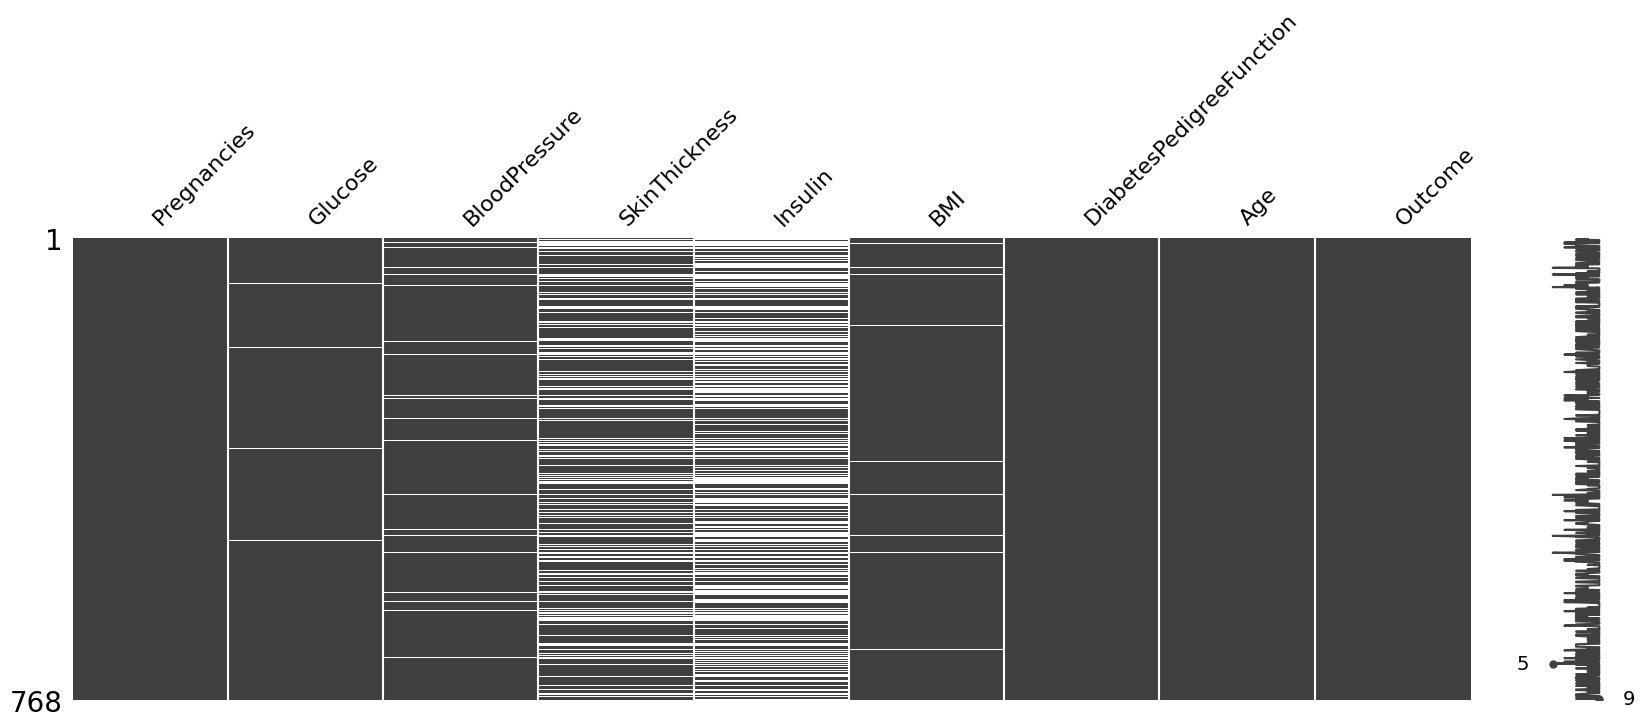

In [11]:
import missingno as mno
mno.matrix(df, figsize = (20, 6))

From the above two graphs, I can notice that there are missing values in the Glucose, BloodPressure, SkinThickness, Insulin and BMI.

I can see there are lot of null values in SkinThickness and Insulin column.
So, after Imputation the mean will change drastically.

In [13]:
#imputing mean instead of null values
for col in df:
    df[col].replace(np.nan, df[col].mean(), inplace=True)

In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.000000,6.000000,17.00
Glucose,768.0,121.686763,30.435949,44.000,99.75000,117.000000,140.250000,199.00
BloodPressure,768.0,72.405184,12.096346,24.000,64.00000,72.202592,80.000000,122.00
SkinThickness,768.0,29.153420,8.790942,7.000,25.00000,29.153420,32.000000,99.00
Insulin,768.0,155.548223,85.021108,14.000,121.50000,155.548223,155.548223,846.00
BMI,768.0,32.457464,6.875151,18.200,27.50000,32.400000,36.600000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.372500,0.626250,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.000000,41.000000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.000000,1.000000,1.00


In [16]:
df.isnull().sum()[1:8]

Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64

It seems that there are no nore null values in the dataset.

<Figure size 2000x2000 with 0 Axes>

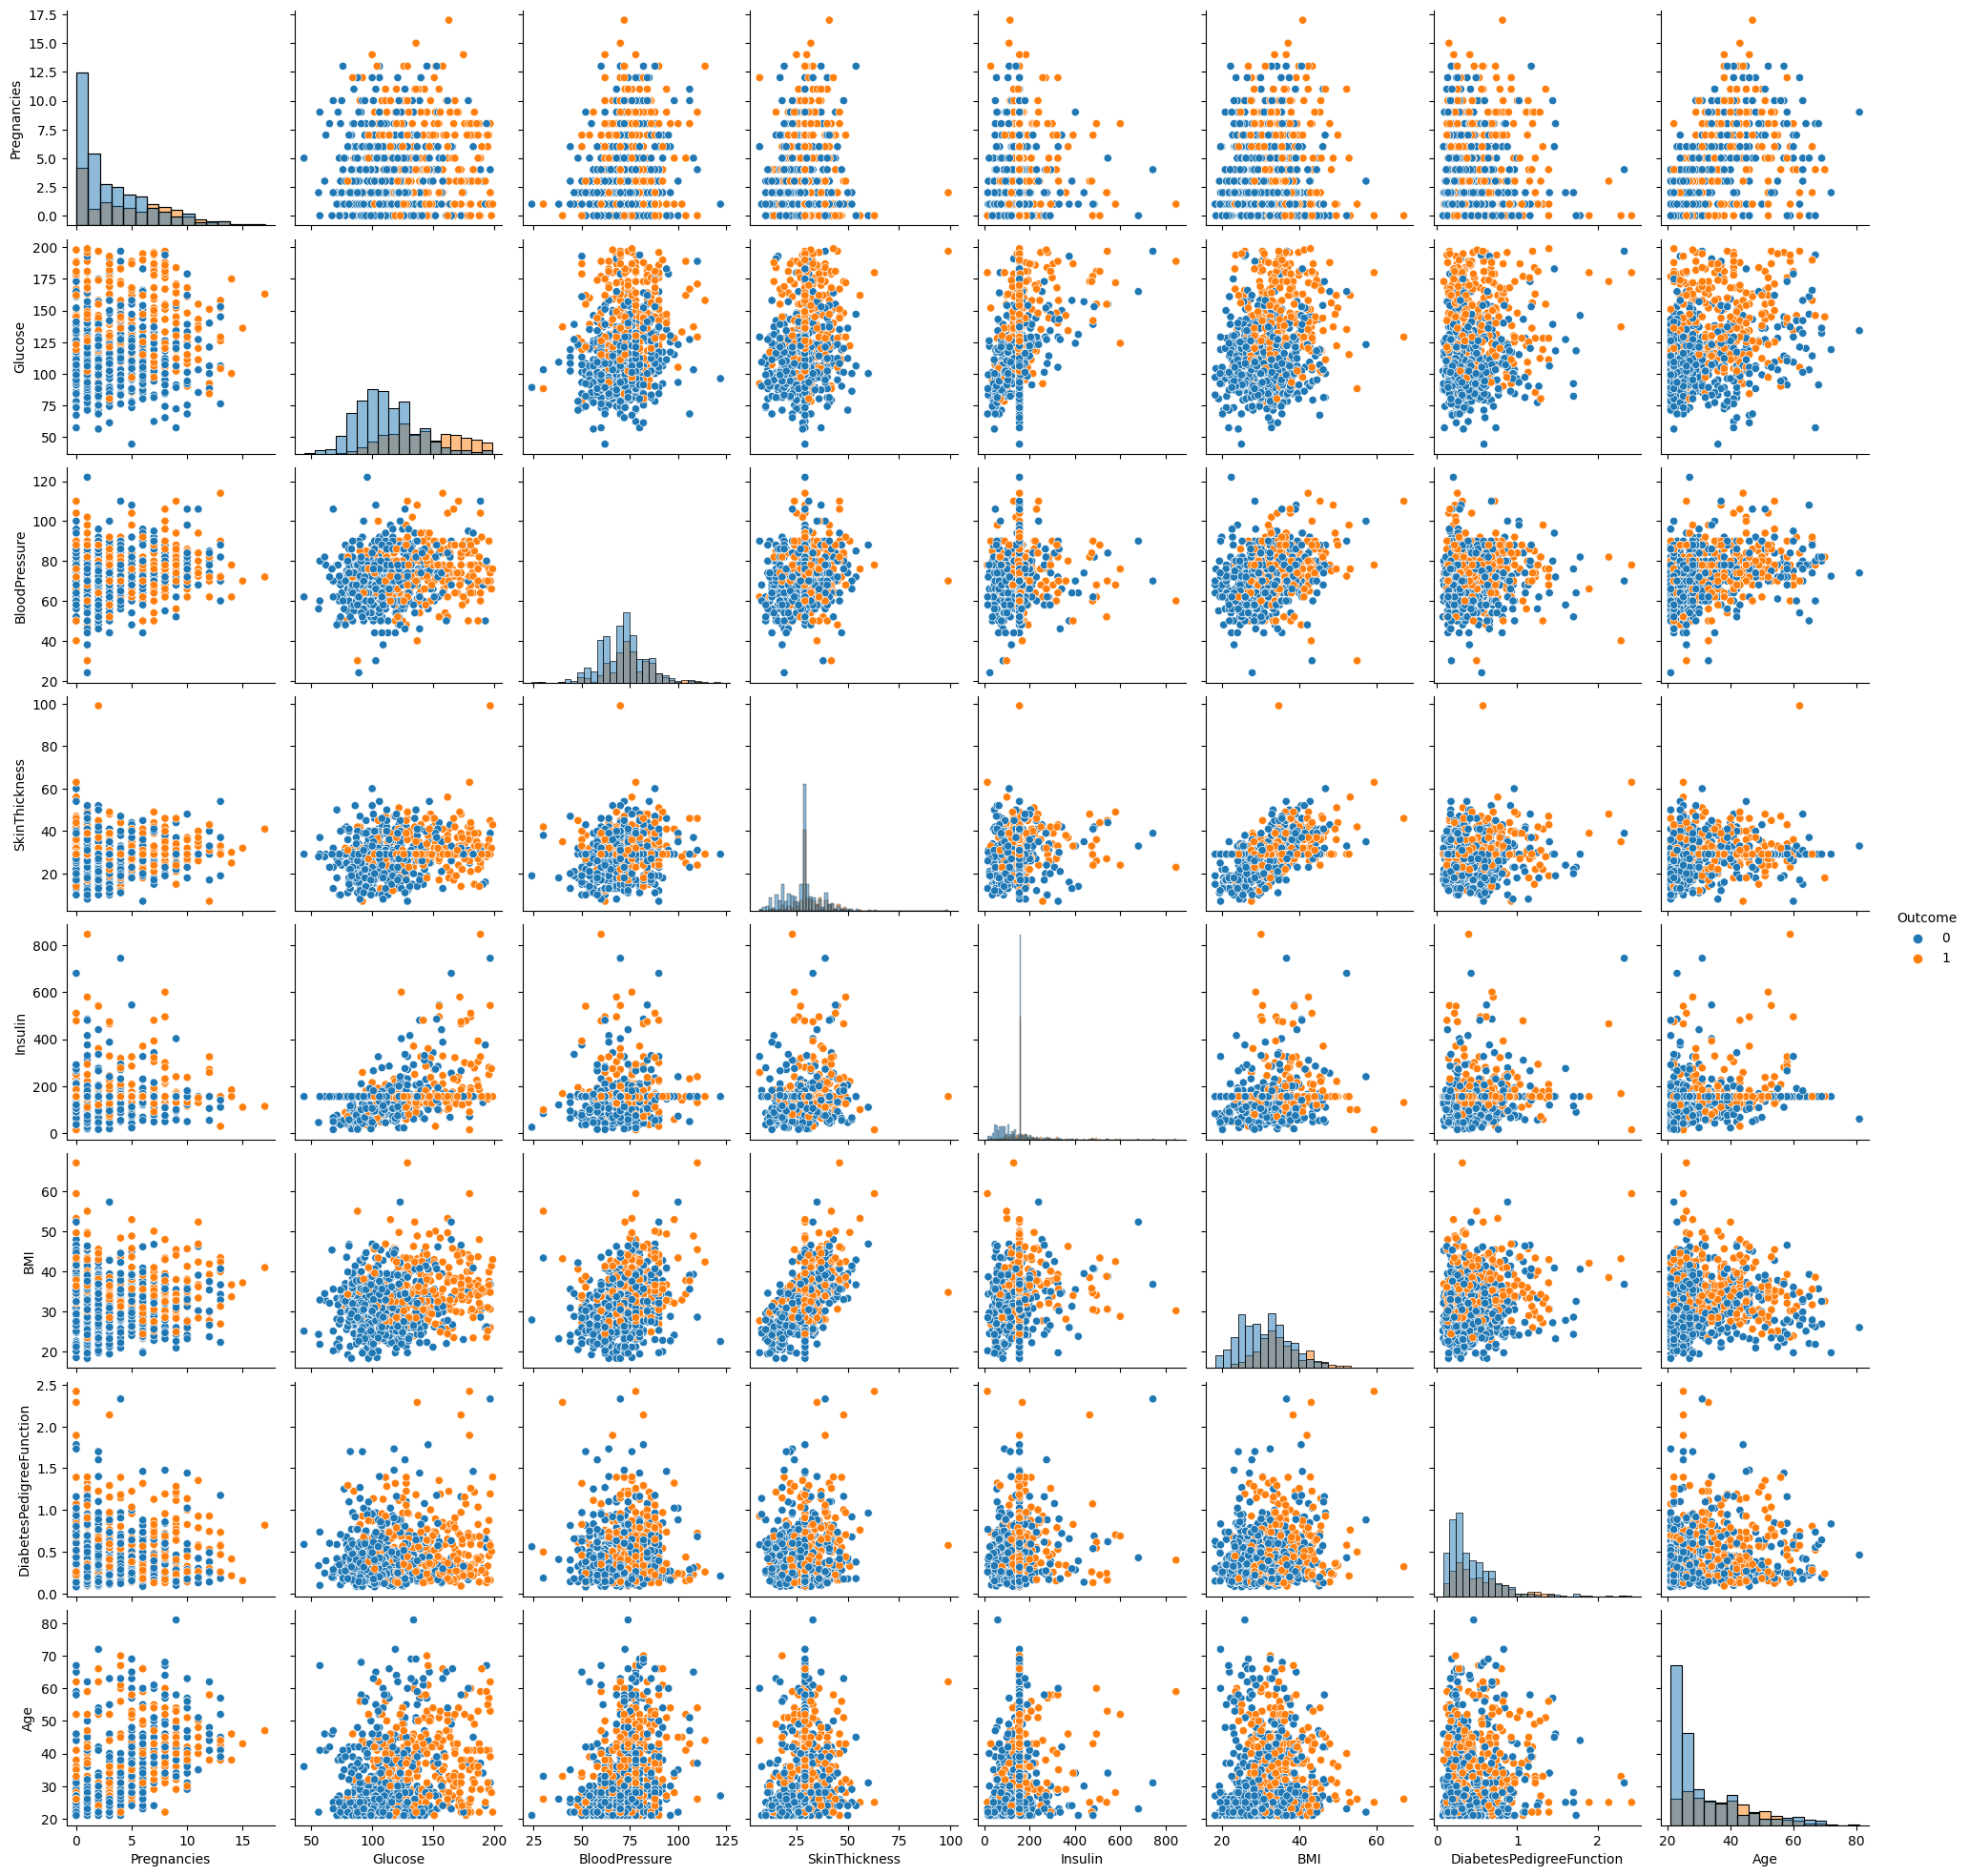

In [17]:
#Plot pairwise relationships in a dataset
plt.figure(figsize=(20,20))
sns.pairplot(data=df, hue="Outcome", diag_kind="hist")
plt.show()

In [18]:
#distribution of outcomes
df["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [19]:
268/500

0.536

The Positive outcome data is with 5% less than the negative one, which could affect the result of the model.

After the feedback that I received, I decied to implement "downsampling", which will decrease the number of samples in the negative outcome.

<center><img width="400px" src="https://editor.analyticsvidhya.com/uploads/30469resampling.png"></center><br>


Downsampling is a mechanism, which reduces the count of training samples falling under the majority class. As it helps to even up the counts of target categories. By removing the collected data, we tend to lose so much valuable information.

Reference: <a href="https://www.analyticsvidhya.com/blog/2020/11/handling-imbalanced-data-machine-learning-computer-vision-and-nlp/">https://editor.analyticsvidhya.com/uploads/30469resampling.png</a>

In [20]:
# put the cells, which are classified as '0' in one data frame
df_neg_outcome = df[df['Outcome']==0]
df_neg_outcome.shape

(500, 9)

In [21]:
# put the cells, which are classified as '1' in one data frame
df_pos_outcome = df[df['Outcome']==1]
df_pos_outcome.shape

(268, 9)

In [22]:
zero_downsamp = df_neg_outcome.sample(df_pos_outcome.shape[0])
zero_downsamp.shape

(268, 9)

In [23]:
df_balanced = pd.concat([zero_downsamp, df_pos_outcome])
df_balanced.shape

(536, 9)

In [24]:
df_balanced['Outcome'].value_counts()

0    268
1    268
Name: Outcome, dtype: int64

Now the numbers are equal, which will take care of the disbalanced dataset.

## Modeling

### Splitting the dataset

In [26]:
X=df_balanced.drop(["Outcome"],axis='columns') # dropping the target variable
y=df_balanced["Outcome"] # keeping the target variable

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

## Standardize the data

In [28]:
# Import `StandardScaler` from `sklearn.preprocessing`
from sklearn.preprocessing import StandardScaler

# Define the scaler 
scaler = StandardScaler().fit(X_train)

# Scale the train set
X_train = scaler.transform(X_train)

# Scale the test set
X_test = scaler.transform(X_test)

In [29]:
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train,y_train, random_state=14)

In [30]:
print("Train data length:",len(X_train))
print("Test data length:",len(X_test))
X_train.shape[1]

Train data length: 428
Test data length: 108


8

In [36]:
# Initializing the model
model = keras.Sequential([
    keras.layers.Dense(2, input_shape=(8,), activation='relu', name="layer1"),
    keras.layers.Dense(3, activation='relu', name="layer2"),
    keras.layers.Dense(1, activation='sigmoid', name="layer3")
])

In [37]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 2)                 18        
                                                                 
 layer2 (Dense)              (None, 3)                 9         
                                                                 
 layer3 (Dense)              (None, 1)                 4         
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [38]:
# Compiling the model
#Computes the cross-entropy loss between true labels and predicted labels.
# Uses this cross-entropy loss for binary (0 or 1) 

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [40]:
# Fitting the model to the Training set
hist = model.fit(X_train, y_train, epochs=70, validation_split=0.2)

Epoch 1/70
11/11 [==============================] - 0s 43ms/step - loss: 0.6845 - accuracy: 0.6170 - val_loss: 0.6646 - val_accuracy: 0.6512
Epoch 2/70
11/11 [==============================] - 0s 8ms/step - loss: 0.6835 - accuracy: 0.6345 - val_loss: 0.6640 - val_accuracy: 0.6512
Epoch 3/70
11/11 [==============================] - 0s 9ms/step - loss: 0.6826 - accuracy: 0.6345 - val_loss: 0.6633 - val_accuracy: 0.6512
Epoch 4/70
11/11 [==============================] - 0s 8ms/step - loss: 0.6816 - accuracy: 0.5994 - val_loss: 0.6626 - val_accuracy: 0.6163
Epoch 5/70
11/11 [==============================] - 0s 9ms/step - loss: 0.6807 - accuracy: 0.6257 - val_loss: 0.6614 - val_accuracy: 0.6395
Epoch 6/70
11/11 [==============================] - 0s 8ms/step - loss: 0.6794 - accuracy: 0.6374 - val_loss: 0.6607 - val_accuracy: 0.6395
Epoch 7/70
11/11 [==============================] - 0s 12ms/step - loss: 0.6785 - accuracy: 0.6374 - val_loss: 0.6598 - val_accuracy: 0.6395
Epoch 8/70
11/11 [

In [45]:
print(model.summary())
model.evaluate(X_test, y_test)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 2)                 18        
                                                                 
 layer2 (Dense)              (None, 3)                 9         
                                                                 
 layer3 (Dense)              (None, 1)                 4         
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________
None
4/4 [==============================] - 0s 4ms/step - loss: 0.5873 - accuracy: 0.7870


[0.5873289108276367, 0.7870370149612427]

In [46]:
from sklearn.metrics import confusion_matrix , classification_report
yp = model.predict(X_test)
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)
print(classification_report(y_test,y_pred))

4/4 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0       0.83      0.76      0.80        59
           1       0.74      0.82      0.78        49

    accuracy                           0.79       108
   macro avg       0.79      0.79      0.79       108
weighted avg       0.79      0.79      0.79       108



The classification report is giving me some better results in comparison with the previous model.

Text(33.22222222222222, 0.5, 'Truth')

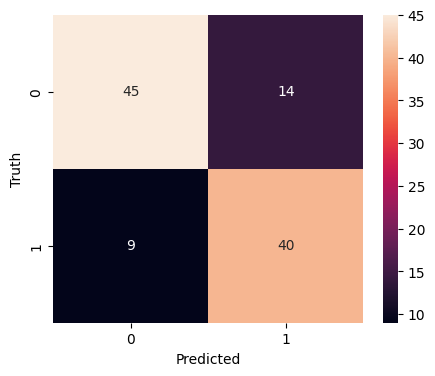

In [50]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (5,4))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

From the confusion matrix above, I can notice that the model did better than before. However, it is still not performing perfect. 
- Overview:
     - Before for the label '0' with the old data was 78 correctly classified and 26 wrong. Now for the '0' label I have 45 correctly predicted and 9 misclassified.
     - Before for the label '1' with the old data was 29 correctly classified and 21 wrong. Now for the label '1' there are 40 correctly predicted and 14 misclassified.

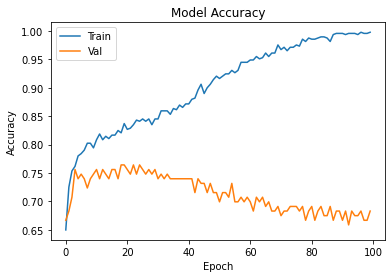

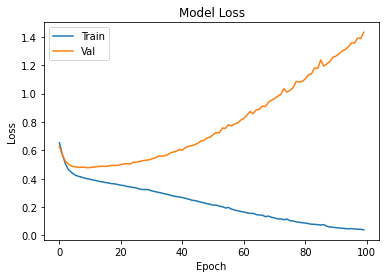

In [30]:
#accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(['Train','Val'],loc='upper left')
plt.show()

#Loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(['Train','Val'],loc='upper left')
plt.show()

The figure above shows the old evaluation matrics for the model's accuracy and loss.

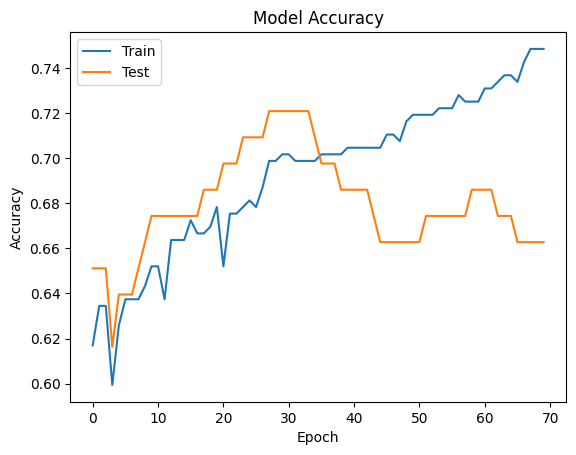

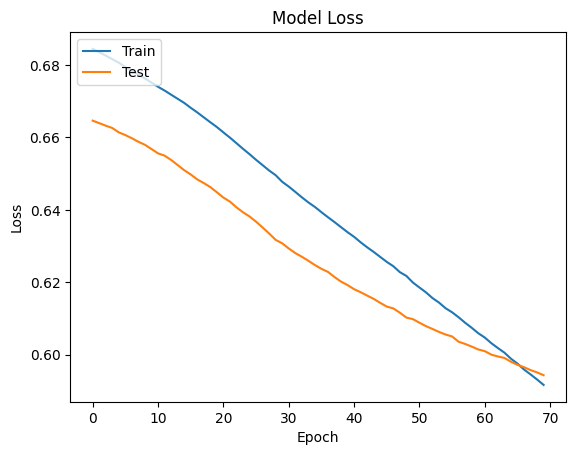

In [52]:
#accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(['Train','Test'],loc='upper left')
plt.show()

#Loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(['Train','Test'],loc='upper left')
plt.show()

The first figure represents the model's accuracy. I can notice that during the first 30 epochs the test and train accuracy are going high and after the 31st epoch the test accuracy starts decreasing, which means that the models starts to overfit. At the end of the epochs, the model might be memorizing the training samples, without actually learning something new. 

The second plot is representing the model's loss. Loss value implies how well or poorly a certain model behaves after each iteration of optimization. What I can observe is that the model's loss started dropping in the beginning and it kept dropping within the training. 

In [53]:
# Evaluating the model on the Test set
model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 7ms/step - loss: 0.5873 - accuracy: 0.7870


[0.5873289108276367, 0.7870370149612427]

In [54]:
# Predicting
yp = model.predict(X_test)
yp[:5]

4/4 [==============================] - 0s 5ms/step


array([[0.38477156],
       [0.38919705],
       [0.38477156],
       [0.47509533],
       [0.5898344 ]], dtype=float32)

## Model Altering

### Random Forest

In [56]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 100, random_state = 0)

In [57]:
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [58]:
rf_prediction=rf.predict(X_test)

In [59]:
print('Accuracy',np.mean(rf.predict(X_test) == y_test)*100)

Accuracy 74.07407407407408


### Decision Tree

In [68]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics

DecisionTree = DecisionTreeClassifier(random_state=0)

In [63]:
DecisionTree.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

In [64]:
pred = DecisionTree.predict(X_test)

In [69]:
print("Accuracy:",metrics.accuracy_score(y_test,pred ) * 100 )

Accuracy: 72.22222222222221


## Conclusion

I have applied the feedback that Nico gave me. He suggested to try a simpler architecture for my neural network model. Before I had a network with 5 layers, now I have applied one with 3 layers (so only one hidden layer instead of three). Moreover, I have applied downsampling to decrease some of the data in the outcome '0' as it was with 5% above (2 times more than) the '1' outcome.
My model still semms to overfit because on the figure with plotting the accuracy of the train and test set, the train accuracy was still increasing, whereas the test accuracy was decreasing. <br>Overall, the Neural Network gave me 74% accuracy.Besides the Neural Network, I have also applied Decision Tree Classifier, which gave me 72% accuracy and Random Forest, which gave 74% accuracy. 

## References

[1] Srivastava, S., Sharma, L., Sharma, V., Kumar, A., & Darbari, H. (2019). Prediction of Diabetes Using Artificial Neural Network Approach. SpringerLink. Retrieved September 15, 2022, from https://link.springer.com/chapter/10.1007/978-981-13-1642-5_59?error=cookies_not_supported&code=8c1f8171-1caf-4d1e-a1d0-df1fa6dbc5ff#:%7E:text=Among%20several%20algorithms%20of%20Machine,with%20the%20sample%20test%20data.

[2] An Improved Artificial Neural Network Model for Effective Diabetes Prediction. (2021, April 22). Retrieved September 15, 2022, from https://www.hindawi.com/journals/complexity/2021/5525271/

[3] Team, K. (n.d.). Keras: the Python deep learning API. Retrieved September 15, 2022, from https://keras.io/

[4] Rune, L. P. W. (2021, October 19). Diabetes Classification with Neural Network | Machine Learning with Python (10 h) | Lesson 06 (0-14). YouTube. Retrieved September 15, 2022, from https://www.youtube.com/watch?v=BYY8eSJkJtA&feature=youtu.be

[5] seaborn: statistical data visualization — seaborn 0.12.0 documentation. (n.d.). Retrieved September 15, 2022, from https://seaborn.pydata.org/

[6] Artificial Intelligence - Neural Networks. (n.d.). Retrieved September 15, 2022, from https://www.tutorialspoint.com/artificial_intelligence/artificial_intelligence_neural_networks.htm

[7] Understanding the Classification report through sklearn – Muthukrishnan. (2018, July 7). Retrieved September 15, 2022, from https://muthu.co/understanding-the-classification-report-in-sklearn/